**Dataset Paris Housing Classification**:

https://www.kaggle.com/datasets/mssmartypants/paris-housing-classification


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yunqiuqiu","key":"9b3eab6c309fdfee027552f2a6c46534"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download mssmartypants/paris-housing-classification

In [ ]:
! unzip "paris-housing-classification.zip"

Archive:  paris-housing-classification.zip
  inflating: ParisHousingClass.csv   
  inflating: ParisHousingClass99.88.csv  


# Data import

In [ ]:
df = pd.read_csv("/content/ParisHousingClass99.88.csv")

In [ ]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Luxury
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [ ]:
df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

In [ ]:
# category starts from 1
df['category'] = pd.factorize(df['category'])[0] + 1
corr = df.corr()
corr['category'].sort_values(ascending=False)

category             1.000000
isNewBuilt           0.579797
hasYard              0.567788
made                 0.008380
floors               0.008273
hasPool              0.006025
cityCode             0.005574
hasGuestRoom         0.001207
hasStorageRoom       0.000189
attic               -0.003978
garage              -0.005081
numPrevOwners       -0.007320
cityPartRange       -0.009496
numberOfRooms       -0.010871
hasStormProtector   -0.011385
price               -0.017663
squareMeters        -0.017982
basement            -0.021868
Name: category, dtype: float64

Text(0.5, 1.0, 'Matrice de corrélation')

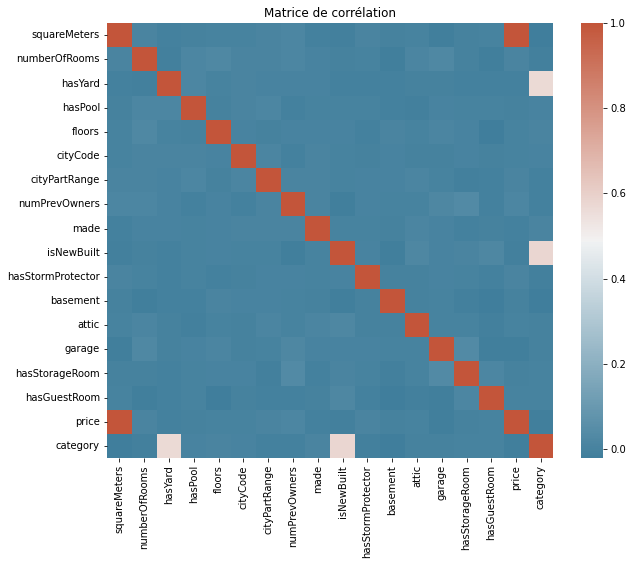

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=False, cmap=cmap)
plt.title('Matrice de corrélation')

# Modeling

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.tree import plot_tree


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

In [ ]:
X = df.drop('category', axis = 1)
y = df['category']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# Scalling data
scaler_train= StandardScaler()
scaler_train.fit(X_train)
scaler_test= StandardScaler()
scaler_test.fit(X_test)
X_train_scaled= scaler_train.transform(X_train)
X_test_scaled= scaler_test.transform(X_test)

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model = tree_model.fit(X_train,y_train)
y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score: ", accuracy)

Accuracy score:  0.997


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

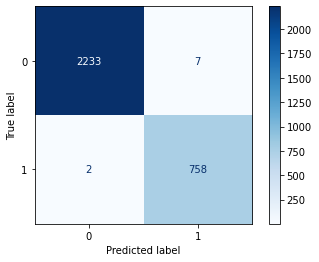

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
cmd = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])

# Configure the display settings
cmd.plot(cmap=plt.cm.Blues, values_format='d')

# Show the plot
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2240
           2       0.99      1.00      0.99       760

    accuracy                           1.00      3000
   macro avg       0.99      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [ ]:
plt.figure(figsize=(100, 80), dpi=150)
plot_tree(tree_model, filled=True, feature_names=X.columns);